### Eigenvector analysis of immune cells dataset

100 Kb-resolution analysis of eigenvector projections for immune dataset.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import joint_lib

In [3]:
import sys
sys.path.append('/home/agalicina/soft/sandbox/pySTATIS')

In [16]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import proplot

# Plotting parameters:
proplot.rc['figure.facecolor'] = 'white'
proplot.rc.update(
    linewidth=1, fontsize=10,
    color='dark blue', suptitlecolor='dark blue',
    titleloc='upper center', titlecolor='dark blue', titleborder=False,
)
mpl.rcParams['font.sans-serif'] = "Arial" # Set the font
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['grid.alpha'] = 0 # Remove the grid
mpl.rcParams['xtick.minor.bottom'] = False # Remove minor ticks
mpl.rcParams['ytick.minor.left'] = False
mpl.rcParams['ytick.minor.right'] = False

import warnings
warnings.filterwarnings('ignore')

import bioframe
import cooler

In [9]:
N_EIGS = 128
CHROMSIZES = bioframe.fetch_chromsizes('mm10', filter_chroms=True)
CHROMOSOMES = list(CHROMSIZES[:'chrY'].index)
BINSIZE = 1_000_000
chunksize = 2000000

COOLER_PATHS = {
    'undiff_unstim': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library_group/undiff_unstim.mm10.mapq_30.1000.mcool',
    'cDC_unstim': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library_group/cDC_unstim.mm10.mapq_30.1000.mcool',
    'pDC_unstim': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library_group/pDC_unstim.mm10.mapq_30.1000.mcool',
    'pDC_CpGA': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library_group/pDC_CpGA.mm10.mapq_30.1000.mcool',

    'IRF8KO': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library_group/IRF8KO_HoxB8.mm10.mapq_30.1000.mcool',
    'SMC3KO_cDC': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library_group/SMC3KO_cDC.mm10.mapq_30.1000.mcool',
    'SMC3KO_pDC': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library_group/SMC3KO_pDC.mm10.mapq_30.1000.mcool',
    'WT_cDC': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library_group/WT_cDC.mm10.mapq_30.1000.mcool',
    'WT_pDC': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library_group/WT_pDC.mm10.mapq_30.1000.mcool',
    
    'cDC_unstim_R1': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library/cDC_unstim_01_S2.mm10.mapq_30.1000.mcool',
    'cDC_unstim_R2': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library/cDC_unstim_02_S6.mm10.mapq_30.1000.mcool',
    'pDC_CpGA_R1': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library/pDC_CpGA_01_S4.mm10.mapq_30.1000.mcool',
    'pDC_CpGA_R2': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library/pDC_CpGA_02_S8.mm10.mapq_30.1000.mcool',
    'pDC_unstim_R1': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library/pDC_unstim_01_S3.mm10.mapq_30.1000.mcool',
    'pDC_unstim_R2': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library/pDC_unstim_02_S7.mm10.mapq_30.1000.mcool',
    'undiff_unstim_R1': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library/undiff_unstim_01_S1.mm10.mapq_30.1000.mcool',
    'undiff_unstim_R2': '/net/levsha/share/lab/reizis2020/disiller_0.3.3-mm10/results/coolers_library/undiff_unstim_02_S5.mm10.mapq_30.1000.mcool',
    'IRF8KO_R1': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/IRF8KO_HoxB8_01_S9.mm10.mapq_30.1000.mcool',
    'IRF8KO_R2': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/IRF8KO_HoxB8_02_S10.mm10.mapq_30.1000.mcool',
    'SMC3KO_cDC_R1': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/SMC3KO_cDC_01_S5.mm10.mapq_30.1000.mcool',
    'SMC3KO_cDC_R2': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/SMC3KO_cDC_02_S6.mm10.mapq_30.1000.mcool',
    'SMC3KO_pDC_R1': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/SMC3KO_pDC_01_S7.mm10.mapq_30.1000.mcool',
    'SMC3KO_pDC_R2': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/SMC3KO_pDC_02_S8.mm10.mapq_30.1000.mcool',
    'WT_cDC_R1': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/WT_cDC_01_S1.mm10.mapq_30.1000.mcool',
    'WT_cDC_R2': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/WT_cDC_02_S2.mm10.mapq_30.1000.mcool',
    'WT_pDC_R1': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/WT_pDC_01_S3.mm10.mapq_30.1000.mcool',
    'WT_pDC_R2': '/net/levsha/share/lab/reizis2020/distiller_0.3.3-mm10_mutants/results/coolers_library/WT_pDC_02_S4.mm10.mapq_30.1000.mcool',

    }

CONDITIONS = [
    'undiff_unstim',
    'cDC_unstim',
    'pDC_unstim',
    'pDC_CpGA',
    'IRF8KO',
    'SMC3KO_cDC',
    'SMC3KO_pDC',
    'WT_cDC',
    'WT_pDC',
    # 'cDC_unstim_R1', 
    # 'cDC_unstim_R2', 
    # 'pDC_CpGA_R1', 
    # 'pDC_CpGA_R2', 
    # 'pDC_unstim_R1', 
    # 'pDC_unstim_R2', 
    # 'undiff_unstim_R1', 
    # 'undiff_unstim_R2', 
    # 'IRF8KO_R1', 
    # 'IRF8KO_R2', 
    # 'SMC3KO_cDC_R1', 
    # 'SMC3KO_cDC_R2', 
    # 'SMC3KO_pDC_R1', 
    # 'SMC3KO_pDC_R2', 
    # 'WT_cDC_R1', 
    # 'WT_cDC_R2', 
    # 'WT_pDC_R1', 
    # 'WT_pDC_R2',
]

In [10]:
COOLERS_DICT = joint_lib.read_coolers(COOLER_PATHS, CONDITIONS, BINSIZE, CHROMOSOMES)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:20<00:00,  2.24s/it, WT_pDC]


In [11]:
JOINT_MTX, GOOD_BINS = joint_lib.list_to_filtered_array(COOLERS_DICT, conditions=CONDITIONS, backend='STATIS', norm=None)

undiff_unstim
        zeros ratio before zero rows removal: 19.65% 
        zeros ratio after zero rows removal: 0.05%
        
cDC_unstim
        zeros ratio before zero rows removal: 19.24% 
        zeros ratio after zero rows removal: 0.05%
        
pDC_unstim
        zeros ratio before zero rows removal: 18.00% 
        zeros ratio after zero rows removal: 0.04%
        
pDC_CpGA
        zeros ratio before zero rows removal: 18.79% 
        zeros ratio after zero rows removal: 0.04%
        
IRF8KO
        zeros ratio before zero rows removal: 18.26% 
        zeros ratio after zero rows removal: 0.05%
        
SMC3KO_cDC
        zeros ratio before zero rows removal: 17.65% 
        zeros ratio after zero rows removal: 0.15%
        
SMC3KO_pDC
        zeros ratio before zero rows removal: 17.31% 
        zeros ratio after zero rows removal: 0.15%
        
WT_cDC
        zeros ratio before zero rows removal: 16.57% 
        zeros ratio after zero rows removal: 0.18%
        
WT_pDC


In [12]:
OUTPUT_STATIS = joint_lib.run_pySTATIS(JOINT_MTX, N_EIGS)

Generating affinity matrices...
undiff_unstim... Done.
cDC_unstim... Done.
pDC_unstim... Done.
pDC_CpGA... Done.
IRF8KO... Done.
SMC3KO_cDC... Done.
SMC3KO_pDC... Done.
WT_cDC... Done.
WT_pDC... Done.
Stack datasets for GSVD...Done!
Getting indices... Done!
Observation masses: Done!
Rv-PCA
Rv-PCA: Hilbert-Schmidt inner products... Done!
Rv-PCA: Decomposing the inner product matrix... Done!
Rv-PCA: Done!
Dataset/variable masses... GSVD
GSVD: Weights... Done!
GSVD: SVD... Done!
GSVD: Factor scores and eigenvalues... Done!
Factor scores for observations... Done!
Calculating factor scores for datasets... Done!
Calculating contributions of observations... .Done!
Calculating contributions of variables... Done!
Calculating contributions of datasets... Done!
Calculating partial inertias for the datasets... Done!
STATIS finished successfully in 71.079 seconds


### Updated part

In [55]:
sys.path.append('/home/agalicina/IMMUNE/joint-decomposition/')
import joint_lib

In [53]:
!pwd

/home/agalicina/IMMUNE


In [56]:
OUTPUT_STATIS = st

In [57]:
CHROMSIZES = bioframe.fetch_chromsizes('mm10', filter_chroms=True)[:'chrY']
CHROMOSOMES = list(CHROMSIZES[:'chrY'].index)
BINSIZE = 100_000

bins = cooler.binnify(CHROMSIZES, BINSIZE)
# clr = cooler.Cooler(COOLER_PATHS[CONDITIONS[0]]+f"::/resolutions/{BINSIZE}")

In [61]:
N_COMP = 10
bins, variance_explained = joint_lib.parse_statis_output(OUTPUT_STATIS, bins, CONDITIONS, good_bins=MASK, n_comp=N_COMP+1)

In [62]:
reference = bins.loc[:, 'consensus-dimension:0':'consensus-dimension:10'].values

In [64]:
# Project to the consensus and store the output:
for cond in CONDITIONS:
    
    proj = joint_lib.transform(OUTPUT[cond], reference, variance_explained, whiten=True)

    cols = [f'transformed:{cond}:{i}' for i in range(N_COMP+1)]
    bins.loc[:, cols] = proj

Irf8KO compartments are in between undifferentiated and cDCs, "immature":

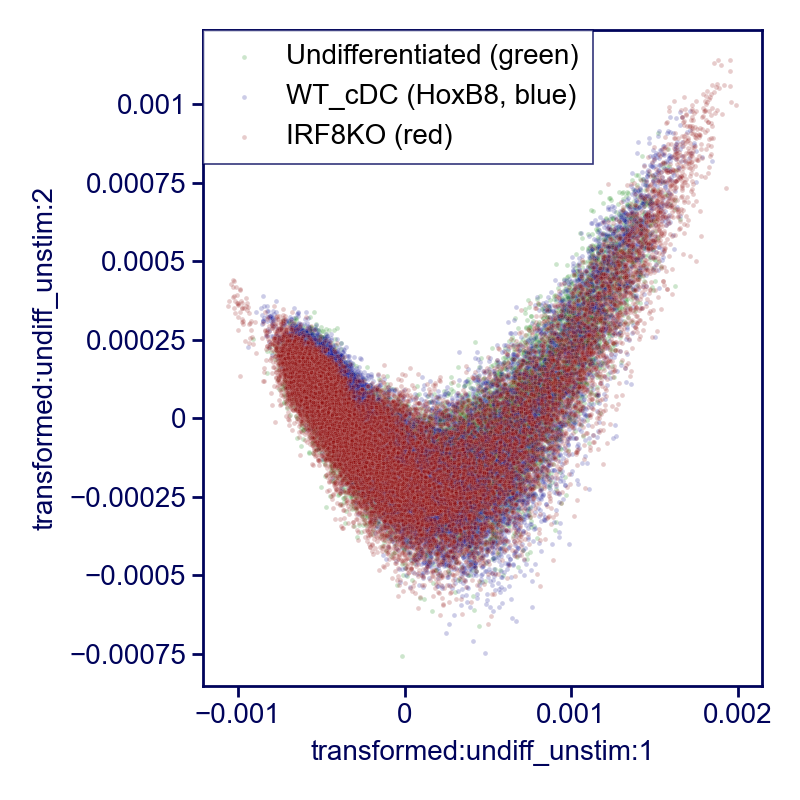

In [81]:
sns.scatterplot(
    x='transformed:undiff_unstim:1',
    y='transformed:undiff_unstim:2',
    data=bins,
    color='green',
    s=3,
    alpha=0.2,
    label="Undifferentiated (green)",
)

sns.scatterplot(
    x='transformed:cDC_unstim:1',
    y='transformed:cDC_unstim:2',
    data=bins,
    color='darkblue',
    s=3,
    alpha=0.2,
    label="WT_cDC (HoxB8, blue)",
)

sns.scatterplot(
    x='transformed:IRF8KO:1',
    y='transformed:IRF8KO:2',
    data=bins,
    color='darkred',
    s=3,
    alpha=0.2,
    label="IRF8KO (red)",
)

# ax.set_facecolor('black')
plt.legend()
plt.tight_layout()

Smc3KO compartments are also in between undifferentiated and cDCs:

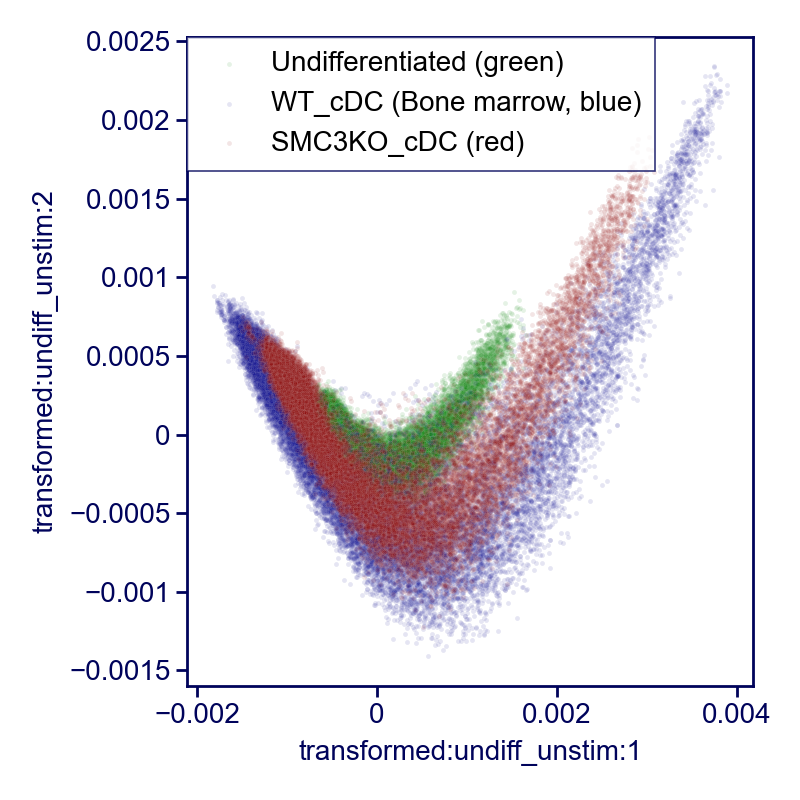

In [82]:
sns.scatterplot(
    x='transformed:undiff_unstim:1',
    y='transformed:undiff_unstim:2',
    data=bins,
    color='green',
    s=3,
    alpha=0.1,
    label="Undifferentiated (green)",
)

sns.scatterplot(
    x='transformed:WT_cDC:1',
    y='transformed:WT_cDC:2',
    data=bins,
    color='darkblue',
    s=3,
    alpha=0.1,
    label="WT_cDC (Bone marrow, blue)",
)

sns.scatterplot(
    x='transformed:SMC3KO_cDC:1',
    y='transformed:SMC3KO_cDC:2',
    data=bins,
    color='darkred',
    s=3,
    alpha=0.1,
    label="SMC3KO_cDC (red)",
)

# ax.set_facecolor('black')
plt.legend()
plt.tight_layout()

However, cDC cells from different batches behave very differently, A/B compartmentalization is more pronounced in WT_cDC cells:

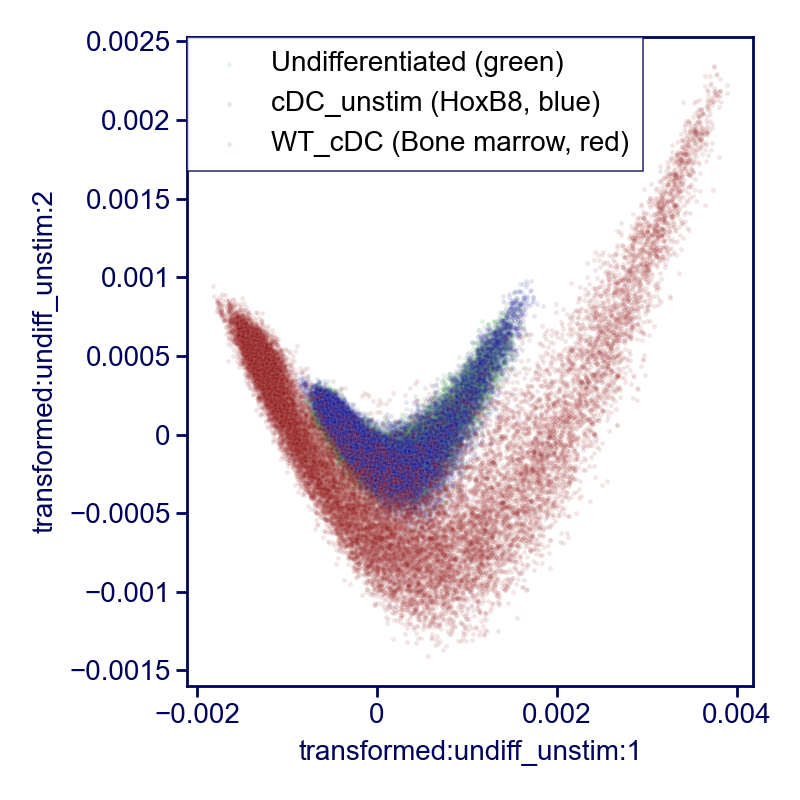

In [83]:
sns.scatterplot(
    x='transformed:undiff_unstim:1',
    y='transformed:undiff_unstim:2',
    data=bins,
    color='green',
    s=3,
    alpha=0.1,
    label="Undifferentiated (green)",
)

sns.scatterplot(
    x='transformed:cDC_unstim:1',
    y='transformed:cDC_unstim:2',
    data=bins,
    color='darkblue',
    s=3,
    alpha=0.1,
    label="cDC_unstim (HoxB8, blue)",
)

sns.scatterplot(
    x='transformed:WT_cDC:1',
    y='transformed:WT_cDC:2',
    data=bins,
    color='darkred',
    s=3,
    alpha=0.1,
    label="WT_cDC (Bone marrow, red)",
)

# ax.set_facecolor('black')
plt.legend()
plt.tight_layout()